<a href="https://colab.research.google.com/github/fjadidi2001/AD_Prediction/blob/main/NEURAL_ARCHITECTURE_SEARCH_WITH_MULTIMODAL_FUSION_METHODS4DIAGNOSING_DEMENTIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Workflow Overview

- Setup and Dependencies Installation
- Dataset Extraction and Exploration
- Audio Preprocessing and Feature Extraction
- Text Generation (ASR) and Linguistic Feature Extraction
- DARTS Neural Architecture Search Implementation
- BERT Text Processing
- Multimodal Fusion Implementation
- Model Training and Evaluation
- Testing and Validation

In [ ]:
# AD Detection Starter Script for Google Colab
# Run this first to test dataset loading and basic setup

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Install required packages
!pip install transformers torch torchaudio librosa speechrecognition pydub scikit-learn

import os
import tarfile
import glob
import librosa
import numpy as np
import pandas as pd
from pathlib import Path

# Step 1: Check and extract datasets
def setup_datasets():
    base_path = "/content/drive/MyDrive/Voice/"

    # Check if files exist
    files_to_check = [
        "ADReSSo21-diagnosis-train.tgz",
        "ADReSSo21-progression-test.tgz",
        "ADReSSo21-progression-train.tgz"
    ]

    print("Checking dataset files...")
    for file in files_to_check:
        full_path = os.path.join(base_path, file)
        if os.path.exists(full_path):
            print(f"✓ Found: {file}")
        else:
            print(f"✗ Missing: {file}")

    # Extract datasets
    print("\nExtracting datasets...")
    for file in files_to_check:
        archive_path = os.path.join(base_path, file)
        extract_path = os.path.join(base_path, file.replace('.tgz', ''))

        if os.path.exists(archive_path) and not os.path.exists(extract_path):
            print(f"Extracting {file}...")
            try:
                with tarfile.open(archive_path, 'r:gz') as tar:
                    tar.extractall(extract_path)
                print(f"✓ Extracted to {extract_path}")
            except Exception as e:
                print(f"✗ Error extracting {file}: {e}")
        elif os.path.exists(extract_path):
            print(f"✓ Already extracted: {file}")

# Step 2: Explore dataset structure
def explore_dataset_structure():
    base_path = "/content/drive/MyDrive/Voice/"

    print("Dataset structure:")
    for root, dirs, files in os.walk(base_path):
        level = root.replace(base_path, '').count(os.sep)
        indent = ' ' * 2 * level
        print(f"{indent}{os.path.basename(root)}/")
        subindent = ' ' * 2 * (level + 1)
        for file in files[:5]:  # Show first 5 files only
            print(f"{subindent}{file}")
        if len(files) > 5:
            print(f"{subindent}... and {len(files) - 5} more files")

# Step 3: Find and analyze audio files
def find_audio_files():
    base_path = "/content/drive/MyDrive/Voice/"
    audio_extensions = ['.wav', '.mp3', '.flac', '.m4a']

    audio_files = []
    for root, dirs, files in os.walk(base_path):
        for file in files:
            if any(file.lower().endswith(ext) for ext in audio_extensions):
                audio_files.append(os.path.join(root, file))

    print(f"\nFound {len(audio_files)} audio files")

    if audio_files:
        print("\nSample audio files:")
        for i, file in enumerate(audio_files[:5]):
            print(f"{i+1}. {file}")

        # Analyze first audio file
        if len(audio_files) > 0:
            print(f"\nAnalyzing first audio file: {audio_files[0]}")
            try:
                y, sr = librosa.load(audio_files[0], duration=10)  # Load first 10 seconds
                print(f"Sample rate: {sr} Hz")
                print(f"Duration: {len(y)/sr:.2f} seconds")
                print(f"Audio shape: {y.shape}")
            except Exception as e:
                print(f"Error loading audio: {e}")

    return audio_files

# Step 4: Check for label information
def check_labels():
    base_path = "/content/drive/MyDrive/Voice/"

    # Look for CSV files or text files that might contain labels
    label_files = []
    for root, dirs, files in os.walk(base_path):
        for file in files:
            if file.lower().endswith(('.csv', '.txt', '.tsv', '.json')):
                label_files.append(os.path.join(root, file))

    print(f"\nFound {len(label_files)} potential label files:")
    for file in label_files:
        print(f"- {file}")

    # Try to read label files
    for file in label_files[:3]:  # Check first 3 files
        try:
            if file.endswith('.csv'):
                df = pd.read_csv(file)
                print(f"\n{file} (CSV):")
                print(f"Shape: {df.shape}")
                print(f"Columns: {list(df.columns)}")
                print(df.head())
            elif file.endswith('.txt'):
                with open(file, 'r') as f:
                    content = f.read()[:500]  # First 500 characters
                print(f"\n{file} (TXT):")
                print(content)
        except Exception as e:
            print(f"Error reading {file}: {e}")

# Step 5: Basic audio feature extraction test
def test_audio_processing():
    print("\nTesting audio processing...")

    # Find an audio file to test
    audio_files = find_audio_files()
    if not audio_files:
        print("No audio files found for testing")
        return

    test_file = audio_files[0]
    print(f"Testing with: {test_file}")

    try:
        # Load audio
        y, sr = librosa.load(test_file, sr=16000, duration=30)  # 30 seconds max

        # Extract basic features
        print("Extracting features...")

        # MFCCs
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        print(f"MFCCs shape: {mfccs.shape}")

        # Spectral features
        spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)
        print(f"Spectral centroids shape: {spectral_centroids.shape}")

        # Zero crossing rate
        zcr = librosa.feature.zero_crossing_rate(y)
        print(f"Zero crossing rate shape: {zcr.shape}")

        print("✓ Audio processing test successful!")

    except Exception as e:
        print(f"✗ Audio processing test failed: {e}")

# Main execution
def run_startup_checks():
    print("=== AD Detection Model Setup ===\n")

    # Run all checks
    setup_datasets()
    explore_dataset_structure()
    audio_files = find_audio_files()
    check_labels()
    test_audio_processing()

    print("\n=== Setup Complete ===")
    print(f"Ready to proceed with model implementation!")
    print(f"Found {len(audio_files) if 'audio_files' in locals() else 0} audio files to work with")

# Run the startup checks
if __name__ == "__main__":
    run_startup_checks()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 857.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 18.9 MB/s eta 0

Failed to install torch torchvision torchaudio
Starting Multimodal AD Detection Model Training...
Extracting /content/drive/MyDrive/Voice/ADReSSo21-diagnosis-train.tgz...
Extracted to /content/drive/MyDrive/Voice/diagnosis_train
Extracting /content/drive/MyDrive/Voice/ADReSSo21-progression-train.tgz...
Extracted to /content/drive/MyDrive/Voice/progression_train
Extracting /content/drive/MyDrive/Voice/ADReSSo21-progression-test.tgz...
Extracted to /content/drive/MyDrive/Voice/progression_test


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Loading audio files...
Found 166 audio files
Creating datasets...
Extracting features...


  0%|          | 0/132 [00:00<?, ?it/s]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso257.wav: No librosa attribute output


  1%|          | 1/132 [00:21<47:55, 21.95s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso183.wav: No librosa attribute output


  2%|▏         | 2/132 [00:30<30:47, 14.21s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso178.wav: No librosa attribute output


  2%|▏         | 3/132 [00:35<21:07,  9.83s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso125.wav: No librosa attribute output


  3%|▎         | 4/132 [00:41<17:31,  8.21s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso268.wav: No librosa attribute output


  4%|▍         | 5/132 [00:47<15:48,  7.47s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso262.wav: No librosa attribute output


  5%|▍         | 6/132 [00:52<13:58,  6.66s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso274.wav: No librosa attribute output


  5%|▌         | 7/132 [01:03<16:59,  8.16s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso248.wav: No librosa attribute output


  6%|▌         | 8/132 [01:10<16:11,  7.83s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso192.wav: No librosa attribute output


  7%|▋         | 9/132 [01:20<17:30,  8.54s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso177.wav: No librosa attribute output


  8%|▊         | 10/132 [01:27<16:01,  7.88s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso160.wav: No librosa attribute output


  8%|▊         | 11/132 [01:31<13:48,  6.85s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso156.wav: No librosa attribute output


  9%|▉         | 12/132 [01:38<13:36,  6.80s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso180.wav: No librosa attribute output


 10%|▉         | 13/132 [01:43<12:27,  6.28s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso157.wav: No librosa attribute output


 11%|█         | 14/132 [01:50<12:35,  6.41s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso110.wav: No librosa attribute output


 11%|█▏        | 15/132 [01:56<12:26,  6.38s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso106.wav: No librosa attribute output


 12%|█▏        | 16/132 [02:03<12:54,  6.68s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso028.wav: No librosa attribute output


 13%|█▎        | 17/132 [02:09<12:02,  6.28s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso316.wav: No librosa attribute output


 14%|█▎        | 18/132 [02:15<11:59,  6.31s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso093.wav: No librosa attribute output


 14%|█▍        | 19/132 [02:21<11:41,  6.20s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso010.wav: No librosa attribute output


 15%|█▌        | 20/132 [02:24<09:45,  5.22s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso259.wav: No librosa attribute output


 16%|█▌        | 21/132 [02:32<10:59,  5.94s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso197.wav: No librosa attribute output


 17%|█▋        | 22/132 [02:39<11:25,  6.23s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso273.wav: No librosa attribute output


 17%|█▋        | 23/132 [02:45<11:14,  6.19s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso232.wav: No librosa attribute output


 18%|█▊        | 24/132 [02:51<11:22,  6.32s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso046.wav: No librosa attribute output


 19%|█▉        | 25/132 [03:00<12:45,  7.15s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso043.wav: No librosa attribute output


 20%|█▉        | 26/132 [03:11<14:21,  8.13s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso016.wav: No librosa attribute output


 20%|██        | 27/132 [03:15<12:12,  6.97s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso039.wav: No librosa attribute output


 21%|██        | 28/132 [03:21<11:35,  6.69s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso266.wav: No librosa attribute output


 22%|██▏       | 29/132 [03:27<11:09,  6.50s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso109.wav: No librosa attribute output


 23%|██▎       | 30/132 [03:34<11:23,  6.70s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso002.wav: No librosa attribute output


 23%|██▎       | 31/132 [03:41<11:29,  6.82s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso292.wav: No librosa attribute output


 24%|██▍       | 32/132 [03:46<10:05,  6.06s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso144.wav: No librosa attribute output


 25%|██▌       | 33/132 [03:53<10:35,  6.42s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso173.wav: No librosa attribute output


 26%|██▌       | 34/132 [03:59<10:23,  6.37s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso053.wav: No librosa attribute output


 27%|██▋       | 35/132 [04:14<14:24,  8.91s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso312.wav: No librosa attribute output


 27%|██▋       | 36/132 [04:21<13:28,  8.43s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso033.wav: No librosa attribute output


 28%|██▊       | 37/132 [04:28<12:27,  7.87s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso291.wav: No librosa attribute output


 29%|██▉       | 38/132 [04:35<12:09,  7.76s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso018.wav: No librosa attribute output


 30%|██▉       | 39/132 [04:41<10:50,  7.00s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso300.wav: No librosa attribute output


 30%|███       | 40/132 [04:44<09:18,  6.07s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso027.wav: No librosa attribute output


 31%|███       | 41/132 [04:52<09:55,  6.55s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso170.wav: No librosa attribute output


 32%|███▏      | 42/132 [04:56<08:43,  5.81s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso003.wav: No librosa attribute output


 33%|███▎      | 43/132 [05:01<07:59,  5.38s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso035.wav: No librosa attribute output


 33%|███▎      | 44/132 [05:07<08:32,  5.82s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso070.wav: No librosa attribute output


 34%|███▍      | 45/132 [05:13<08:25,  5.81s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso276.wav: No librosa attribute output


 35%|███▍      | 46/132 [05:26<11:28,  8.01s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso078.wav: No librosa attribute output


 36%|███▌      | 47/132 [05:38<12:43,  8.98s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso072.wav: No librosa attribute output


 36%|███▋      | 48/132 [05:43<10:59,  7.85s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso098.wav: No librosa attribute output


 37%|███▋      | 49/132 [05:49<10:16,  7.43s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso280.wav: No librosa attribute output


 38%|███▊      | 50/132 [05:58<10:42,  7.83s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso122.wav: No librosa attribute output


 39%|███▊      | 51/132 [06:03<09:18,  6.89s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso289.wav: No librosa attribute output


 39%|███▉      | 52/132 [06:10<09:07,  6.84s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso159.wav: No librosa attribute output


 40%|████      | 53/132 [06:14<08:16,  6.29s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso148.wav: No librosa attribute output


 41%|████      | 54/132 [06:23<08:56,  6.88s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso019.wav: No librosa attribute output


 42%|████▏     | 55/132 [06:28<08:05,  6.31s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso315.wav: No librosa attribute output


 42%|████▏     | 56/132 [06:33<07:41,  6.08s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso310.wav: No librosa attribute output


 43%|████▎     | 57/132 [06:39<07:33,  6.05s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso307.wav: No librosa attribute output


 44%|████▍     | 58/132 [06:45<07:19,  5.94s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso264.wav: No librosa attribute output


 45%|████▍     | 59/132 [06:52<07:48,  6.42s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso165.wav: No librosa attribute output


 45%|████▌     | 60/132 [06:57<07:10,  5.98s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso168.wav: No librosa attribute output


 46%|████▌     | 61/132 [07:06<07:51,  6.64s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso299.wav: No librosa attribute output


 47%|████▋     | 62/132 [07:18<09:44,  8.35s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso222.wav: No librosa attribute output


 48%|████▊     | 63/132 [07:24<08:46,  7.64s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso308.wav: No librosa attribute output


 48%|████▊     | 64/132 [07:30<08:14,  7.27s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso267.wav: No librosa attribute output


 49%|████▉     | 65/132 [07:36<07:34,  6.79s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso309.wav: No librosa attribute output


 50%|█████     | 66/132 [07:41<06:50,  6.22s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso265.wav: No librosa attribute output


 51%|█████     | 67/132 [07:50<07:49,  7.22s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso188.wav: No librosa attribute output


 52%|█████▏    | 68/132 [07:57<07:25,  6.96s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso190.wav: No librosa attribute output


 52%|█████▏    | 69/132 [08:07<08:10,  7.79s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso123.wav: No librosa attribute output


 53%|█████▎    | 70/132 [08:12<07:17,  7.05s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso112.wav: No librosa attribute output


 54%|█████▍    | 71/132 [08:18<06:53,  6.77s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso211.wav: No librosa attribute output


 55%|█████▍    | 72/132 [08:24<06:25,  6.42s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso296.wav: No librosa attribute output


 55%|█████▌    | 73/132 [08:33<07:19,  7.45s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso206.wav: No librosa attribute output


 56%|█████▌    | 74/132 [08:40<06:58,  7.22s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso128.wav: No librosa attribute output


 57%|█████▋    | 75/132 [08:48<07:09,  7.54s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso092.wav: No librosa attribute output


 58%|█████▊    | 76/132 [08:52<06:00,  6.43s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso116.wav: No librosa attribute output


 58%|█████▊    | 77/132 [09:02<06:44,  7.35s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso278.wav: No librosa attribute output


 59%|█████▉    | 78/132 [09:05<05:31,  6.13s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso045.wav: No librosa attribute output


 60%|█████▉    | 79/132 [09:21<08:05,  9.17s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso209.wav: No librosa attribute output


 61%|██████    | 80/132 [09:32<08:22,  9.66s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso049.wav: No librosa attribute output


 61%|██████▏   | 81/132 [09:45<08:57, 10.54s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso277.wav: No librosa attribute output


 62%|██████▏   | 82/132 [09:51<07:39,  9.20s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso161.wav: No librosa attribute output


 63%|██████▎   | 83/132 [09:55<06:24,  7.84s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso142.wav: No librosa attribute output


 64%|██████▎   | 84/132 [09:59<05:15,  6.58s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso164.wav: No librosa attribute output


 64%|██████▍   | 85/132 [10:09<05:52,  7.50s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso021.wav: No librosa attribute output


 65%|██████▌   | 86/132 [10:15<05:25,  7.08s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso172.wav: No librosa attribute output


 66%|██████▌   | 87/132 [10:23<05:35,  7.45s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso154.wav: No librosa attribute output


 67%|██████▋   | 88/132 [10:28<04:52,  6.64s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso054.wav: No librosa attribute output


 67%|██████▋   | 89/132 [10:41<06:04,  8.48s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso286.wav: No librosa attribute output


 68%|██████▊   | 90/132 [10:46<05:11,  7.41s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso153.wav: No librosa attribute output


 69%|██████▉   | 91/132 [10:54<05:22,  7.87s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso298.wav: No librosa attribute output


 70%|██████▉   | 92/132 [11:01<05:01,  7.53s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso134.wav: No librosa attribute output


 70%|███████   | 93/132 [11:06<04:21,  6.70s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso283.wav: No librosa attribute output


 71%|███████   | 94/132 [11:13<04:15,  6.72s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso202.wav: No librosa attribute output


 72%|███████▏  | 95/132 [11:26<05:26,  8.83s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso234.wav: No librosa attribute output


 73%|███████▎  | 96/132 [11:33<04:57,  8.27s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso223.wav: No librosa attribute output


 73%|███████▎  | 97/132 [11:41<04:43,  8.11s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso200.wav: No librosa attribute output


 74%|███████▍  | 98/132 [11:53<05:12,  9.19s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso245.wav: No librosa attribute output


 75%|███████▌  | 99/132 [11:57<04:14,  7.70s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso233.wav: No librosa attribute output


 76%|███████▌  | 100/132 [12:05<04:08,  7.77s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso162.wav: No librosa attribute output


 77%|███████▋  | 101/132 [12:11<03:45,  7.26s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso249.wav: No librosa attribute output


 77%|███████▋  | 102/132 [12:16<03:18,  6.62s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso056.wav: No librosa attribute output


 78%|███████▊  | 103/132 [12:38<05:20, 11.05s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso055.wav: No librosa attribute output


 79%|███████▉  | 104/132 [12:46<04:46, 10.22s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso059.wav: No librosa attribute output


 80%|███████▉  | 105/132 [12:50<03:47,  8.42s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso023.wav: No librosa attribute output


 80%|████████  | 106/132 [12:56<03:18,  7.63s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso253.wav: No librosa attribute output


 81%|████████  | 107/132 [13:02<02:57,  7.09s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso186.wav: No librosa attribute output


 82%|████████▏ | 108/132 [13:06<02:27,  6.15s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso031.wav: No librosa attribute output


 83%|████████▎ | 109/132 [13:13<02:31,  6.59s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso224.wav: No librosa attribute output


 83%|████████▎ | 110/132 [13:19<02:17,  6.26s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso036.wav: No librosa attribute output


 84%|████████▍ | 111/132 [13:24<02:04,  5.94s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso158.wav: No librosa attribute output


 85%|████████▍ | 112/132 [13:30<01:58,  5.91s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso090.wav: No librosa attribute output


 86%|████████▌ | 113/132 [13:38<02:05,  6.63s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso302.wav: No librosa attribute output


 86%|████████▋ | 114/132 [13:45<02:02,  6.79s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso060.wav: No librosa attribute output


 87%|████████▋ | 115/132 [13:52<01:53,  6.66s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso068.wav: No librosa attribute output


 88%|████████▊ | 116/132 [13:56<01:36,  6.01s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso071.wav: No librosa attribute output


 89%|████████▊ | 117/132 [14:02<01:27,  5.81s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso025.wav: No librosa attribute output


 89%|████████▉ | 118/132 [14:17<02:03,  8.84s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso215.wav: No librosa attribute output


 90%|█████████ | 119/132 [14:25<01:48,  8.33s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso005.wav: No librosa attribute output


 91%|█████████ | 120/132 [14:31<01:31,  7.64s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso032.wav: No librosa attribute output


 92%|█████████▏| 121/132 [14:38<01:22,  7.51s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso074.wav: No librosa attribute output


 92%|█████████▏| 122/132 [14:47<01:18,  7.87s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso075.wav: No librosa attribute output


 93%|█████████▎| 123/132 [14:51<01:00,  6.71s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso077.wav: No librosa attribute output


 94%|█████████▍| 124/132 [14:55<00:48,  6.10s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso012.wav: No librosa attribute output


 95%|█████████▍| 125/132 [15:02<00:43,  6.23s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso167.wav: No librosa attribute output


 95%|█████████▌| 126/132 [15:09<00:38,  6.41s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso220.wav: No librosa attribute output


 96%|█████████▌| 127/132 [15:19<00:38,  7.75s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso047.wav: No librosa attribute output


 97%|█████████▋| 128/132 [15:25<00:28,  7.00s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso189.wav: No librosa attribute output


 98%|█████████▊| 129/132 [15:31<00:20,  6.70s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso007.wav: No librosa attribute output


 98%|█████████▊| 130/132 [15:34<00:11,  5.62s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso216.wav: No librosa attribute output


 99%|█████████▉| 131/132 [15:51<00:09,  9.10s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso263.wav: No librosa attribute output


100%|██████████| 132/132 [15:57<00:00,  7.25s/it]


Extracting features...


  0%|          | 0/34 [00:00<?, ?it/s]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso246.wav: No librosa attribute output


  3%|▎         | 1/34 [00:04<02:44,  4.97s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso260.wav: No librosa attribute output


  6%|▌         | 2/34 [00:10<02:46,  5.21s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso244.wav: No librosa attribute output


  9%|▉         | 3/34 [00:17<03:12,  6.20s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso228.wav: No librosa attribute output


 12%|█▏        | 4/34 [00:23<03:05,  6.18s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso198.wav: No librosa attribute output


 15%|█▍        | 5/34 [00:33<03:37,  7.50s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso141.wav: No librosa attribute output


 18%|█▊        | 6/34 [00:38<03:05,  6.64s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso281.wav: No librosa attribute output


 21%|██        | 7/34 [00:45<02:58,  6.61s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso130.wav: No librosa attribute output


 24%|██▎       | 8/34 [00:48<02:27,  5.66s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso089.wav: No librosa attribute output


 26%|██▋       | 9/34 [00:54<02:20,  5.60s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso151.wav: No librosa attribute output


 29%|██▉       | 10/34 [00:59<02:12,  5.53s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso237.wav: No librosa attribute output


 32%|███▏      | 11/34 [01:05<02:06,  5.50s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso205.wav: No librosa attribute output


 35%|███▌      | 12/34 [01:11<02:08,  5.82s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso152.wav: No librosa attribute output


 38%|███▊      | 13/34 [01:17<01:59,  5.71s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso126.wav: No librosa attribute output


 41%|████      | 14/34 [01:24<02:05,  6.27s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso261.wav: No librosa attribute output


 44%|████▍     | 15/34 [01:35<02:24,  7.60s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso182.wav: No librosa attribute output


 47%|████▋     | 16/34 [01:42<02:11,  7.33s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso236.wav: No librosa attribute output


 50%|█████     | 17/34 [01:47<01:56,  6.83s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso250.wav: No librosa attribute output


 53%|█████▎    | 18/34 [01:54<01:50,  6.91s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso015.wav: No librosa attribute output


 56%|█████▌    | 19/34 [02:02<01:46,  7.09s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso270.wav: No librosa attribute output


 59%|█████▉    | 20/34 [02:08<01:37,  6.95s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso218.wav: No librosa attribute output


 62%|██████▏   | 21/34 [02:15<01:27,  6.76s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso008.wav: No librosa attribute output


 65%|██████▍   | 22/34 [02:20<01:14,  6.21s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso138.wav: No librosa attribute output


 68%|██████▊   | 23/34 [02:26<01:06,  6.07s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso063.wav: No librosa attribute output


 71%|███████   | 24/34 [02:31<01:00,  6.04s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso024.wav: No librosa attribute output


 74%|███████▎  | 25/34 [02:49<01:26,  9.56s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso229.wav: No librosa attribute output


 76%|███████▋  | 26/34 [02:58<01:15,  9.43s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso169.wav: No librosa attribute output


 79%|███████▉  | 27/34 [03:02<00:54,  7.80s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso285.wav: No librosa attribute output


 82%|████████▏ | 28/34 [03:07<00:41,  6.85s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso187.wav: No librosa attribute output


 85%|████████▌ | 29/34 [03:14<00:35,  7.03s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso017.wav: No librosa attribute output


 88%|████████▊ | 30/34 [03:20<00:26,  6.64s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso022.wav: No librosa attribute output


 91%|█████████ | 31/34 [03:25<00:18,  6.08s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/cn/adrso014.wav: No librosa attribute output


 94%|█████████▍| 32/34 [03:30<00:11,  5.92s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso247.wav: No librosa attribute output


 97%|█████████▋| 33/34 [03:37<00:06,  6.24s/it]

Speech recognition failed for /content/drive/MyDrive/Voice/diagnosis_train/ADReSSo21/diagnosis/train/audio/ad/adrso212.wav: No librosa attribute output


100%|██████████| 34/34 [03:47<00:00,  6.69s/it]


Audio feature dimension: 141
Text feature dimension: 768
Starting training...


Epoch 1/50: 100%|██████████| 17/17 [00:00<00:00, 19.30it/s]


Epoch [1/50], Loss: 0.3956, Val Accuracy: 100.00%


Epoch 2/50: 100%|██████████| 17/17 [00:00<00:00, 38.84it/s]


Epoch [2/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 3/50: 100%|██████████| 17/17 [00:00<00:00, 39.97it/s]


Epoch [3/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 4/50: 100%|██████████| 17/17 [00:00<00:00, 26.54it/s]


Epoch [4/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 5/50: 100%|██████████| 17/17 [00:00<00:00, 29.81it/s]


Epoch [5/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 6/50: 100%|██████████| 17/17 [00:00<00:00, 26.44it/s]


Epoch [6/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 7/50: 100%|██████████| 17/17 [00:00<00:00, 27.67it/s]


Epoch [7/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 8/50: 100%|██████████| 17/17 [00:00<00:00, 27.89it/s]


Epoch [8/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 9/50: 100%|██████████| 17/17 [00:00<00:00, 27.00it/s]


Epoch [9/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 10/50: 100%|██████████| 17/17 [00:00<00:00, 40.61it/s]


Epoch [10/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 11/50: 100%|██████████| 17/17 [00:00<00:00, 40.90it/s]


Epoch [11/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 12/50: 100%|██████████| 17/17 [00:00<00:00, 39.88it/s]


Epoch [12/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 13/50: 100%|██████████| 17/17 [00:00<00:00, 40.11it/s]


Epoch [13/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 14/50: 100%|██████████| 17/17 [00:00<00:00, 38.86it/s]


Epoch [14/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 15/50: 100%|██████████| 17/17 [00:00<00:00, 38.65it/s]


Epoch [15/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 16/50: 100%|██████████| 17/17 [00:00<00:00, 38.69it/s]


Epoch [16/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 17/50: 100%|██████████| 17/17 [00:00<00:00, 39.40it/s]


Epoch [17/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 18/50: 100%|██████████| 17/17 [00:00<00:00, 39.22it/s]


Epoch [18/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 19/50: 100%|██████████| 17/17 [00:00<00:00, 39.69it/s]


Epoch [19/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 20/50: 100%|██████████| 17/17 [00:00<00:00, 40.58it/s]


Epoch [20/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 21/50: 100%|██████████| 17/17 [00:00<00:00, 38.66it/s]


Epoch [21/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 22/50: 100%|██████████| 17/17 [00:00<00:00, 40.14it/s]


Epoch [22/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 23/50: 100%|██████████| 17/17 [00:00<00:00, 37.86it/s]


Epoch [23/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 24/50: 100%|██████████| 17/17 [00:00<00:00, 40.52it/s]


Epoch [24/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 25/50: 100%|██████████| 17/17 [00:00<00:00, 39.15it/s]


Epoch [25/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 26/50: 100%|██████████| 17/17 [00:00<00:00, 40.05it/s]


Epoch [26/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 27/50: 100%|██████████| 17/17 [00:00<00:00, 39.55it/s]


Epoch [27/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 28/50: 100%|██████████| 17/17 [00:00<00:00, 39.15it/s]


Epoch [28/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 29/50: 100%|██████████| 17/17 [00:00<00:00, 40.39it/s]


Epoch [29/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 30/50: 100%|██████████| 17/17 [00:00<00:00, 36.92it/s]


Epoch [30/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 31/50: 100%|██████████| 17/17 [00:00<00:00, 31.43it/s]


Epoch [31/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 32/50: 100%|██████████| 17/17 [00:00<00:00, 26.38it/s]


Epoch [32/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 33/50: 100%|██████████| 17/17 [00:00<00:00, 25.99it/s]


Epoch [33/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 34/50: 100%|██████████| 17/17 [00:00<00:00, 27.61it/s]


Epoch [34/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 35/50: 100%|██████████| 17/17 [00:00<00:00, 25.60it/s]


Epoch [35/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 36/50: 100%|██████████| 17/17 [00:00<00:00, 26.79it/s]


Epoch [36/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 37/50: 100%|██████████| 17/17 [00:00<00:00, 36.93it/s]


Epoch [37/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 38/50: 100%|██████████| 17/17 [00:00<00:00, 32.32it/s]


Epoch [38/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 39/50: 100%|██████████| 17/17 [00:00<00:00, 29.13it/s]


Epoch [39/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 40/50: 100%|██████████| 17/17 [00:00<00:00, 25.23it/s]


Epoch [40/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 41/50: 100%|██████████| 17/17 [00:00<00:00, 22.76it/s]


Epoch [41/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 42/50: 100%|██████████| 17/17 [00:00<00:00, 22.50it/s]


Epoch [42/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 43/50: 100%|██████████| 17/17 [00:00<00:00, 21.24it/s]


Epoch [43/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 44/50: 100%|██████████| 17/17 [00:00<00:00, 20.68it/s]


Epoch [44/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 45/50: 100%|██████████| 17/17 [00:00<00:00, 19.57it/s]


Epoch [45/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 46/50: 100%|██████████| 17/17 [00:00<00:00, 19.04it/s]


Epoch [46/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 47/50: 100%|██████████| 17/17 [00:00<00:00, 18.89it/s]


Epoch [47/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 48/50: 100%|██████████| 17/17 [00:00<00:00, 19.63it/s]


Epoch [48/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 49/50: 100%|██████████| 17/17 [00:00<00:00, 19.18it/s]


Epoch [49/50], Loss: 0.0000, Val Accuracy: 100.00%


Epoch 50/50: 100%|██████████| 17/17 [00:01<00:00, 15.64it/s]


Epoch [50/50], Loss: 0.0000, Val Accuracy: 100.00%


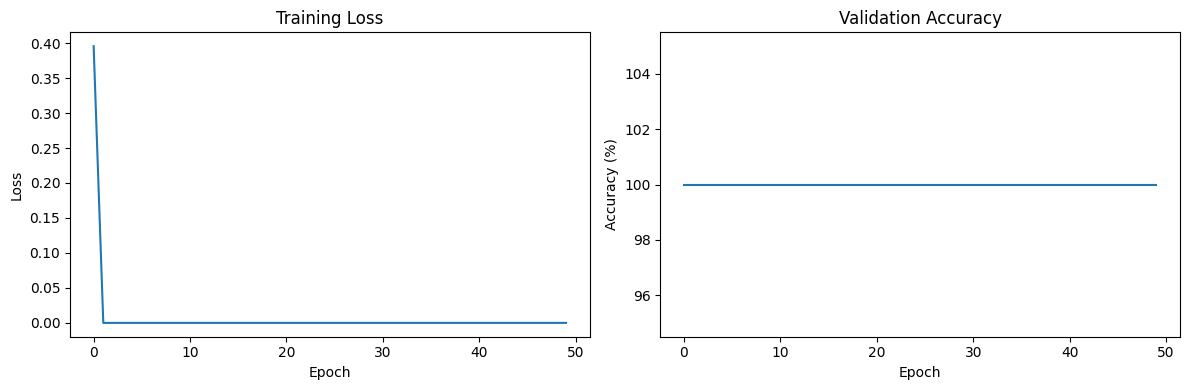

Model saved successfully!


In [ ]:
# Multimodal Alzheimer's Detection Model Implementation
# Based on BERT + DARTS Architecture

import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchaudio
import numpy as np
import pandas as pd
import librosa
import speech_recognition as sr
from transformers import BertTokenizer, BertModel, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import Dataset, DataLoader
import tarfile
import glob
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Step 1: Setup and Installation
def install_dependencies():
    """Install required packages"""
    import subprocess
    import sys

    packages = [
        'torch torchvision torchaudio',
        'transformers',
        'librosa',
        'SpeechRecognition',
        'pydub',
        'scikit-learn',
        'matplotlib',
        'seaborn',
        'pandas',
        'numpy',
        'tqdm'
    ]

    for package in packages:
        try:
            subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])
        except:
            print(f"Failed to install {package}")

# Step 2: Dataset Extraction and Loading
class ADReSSoDatasetLoader:
    def __init__(self, base_path="/content/drive/MyDrive/Voice/"):
        self.base_path = base_path
        self.train_diagnosis_path = os.path.join(base_path, "ADReSSo21-diagnosis-train.tgz")
        self.train_progression_path = os.path.join(base_path, "ADReSSo21-progression-train.tgz")
        self.test_progression_path = os.path.join(base_path, "ADReSSo21-progression-test.tgz")

        # Extract datasets
        self.extract_datasets()

    def extract_datasets(self):
        """Extract all dataset archives"""
        datasets = [
            (self.train_diagnosis_path, "diagnosis_train"),
            (self.train_progression_path, "progression_train"),
            (self.test_progression_path, "progression_test")
        ]

        for archive_path, folder_name in datasets:
            if os.path.exists(archive_path):
                extract_path = os.path.join(self.base_path, folder_name)
                if not os.path.exists(extract_path):
                    print(f"Extracting {archive_path}...")
                    with tarfile.open(archive_path, 'r:gz') as tar:
                        tar.extractall(extract_path)
                    print(f"Extracted to {extract_path}")
                else:
                    print(f"{folder_name} already extracted")

    def load_audio_files(self):
        """Load all audio files and their labels"""
        audio_files = []
        labels = []

        # Load diagnosis training data
        diagnosis_path = os.path.join(self.base_path, "diagnosis_train")
        if os.path.exists(diagnosis_path):
            # Look for audio files and corresponding labels
            for root, dirs, files in os.walk(diagnosis_path):
                for file in files:
                    if file.endswith(('.wav', '.mp3', '.flac')):
                        audio_path = os.path.join(root, file)
                        # Extract label from filename or folder structure
                        # Assuming AD/Control classification from folder or filename
                        if 'ad' in file.lower() or 'ad' in root.lower():
                            label = 1  # AD patient
                        else:
                            label = 0  # Control

                        audio_files.append(audio_path)
                        labels.append(label)

        return audio_files, labels

# Step 3: Audio Feature Extraction
class AudioFeatureExtractor:
    def __init__(self, sample_rate=16000):
        self.sample_rate = sample_rate

    def extract_acoustic_features(self, audio_path):
        """Extract comprehensive acoustic features"""
        try:
            # Load audio
            y, sr = librosa.load(audio_path, sr=self.sample_rate)

            # Extract various acoustic features
            features = {}

            # Spectral features
            features['mfcc'] = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
            features['spectral_centroid'] = librosa.feature.spectral_centroid(y=y, sr=sr)
            features['spectral_rolloff'] = librosa.feature.spectral_rolloff(y=y, sr=sr)
            features['spectral_bandwidth'] = librosa.feature.spectral_bandwidth(y=y, sr=sr)
            features['zero_crossing_rate'] = librosa.feature.zero_crossing_rate(y)

            # Prosodic features
            features['tempo'], _ = librosa.beat.beat_track(y=y, sr=sr)
            features['chroma'] = librosa.feature.chroma_stft(y=y, sr=sr)
            features['tonnetz'] = librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr)

            # Aggregate features (mean, std, etc.)
            aggregated_features = []
            for key, value in features.items():
                if key == 'tempo':
                    aggregated_features.append(value)
                else:
                    if value.ndim > 1:
                        aggregated_features.extend([
                            np.mean(value, axis=1),
                            np.std(value, axis=1),
                            np.max(value, axis=1),
                            np.min(value, axis=1)
                        ])
                    else:
                        aggregated_features.extend([
                            np.mean(value),
                            np.std(value),
                            np.max(value),
                            np.min(value)
                        ])

            # Flatten all features
            feature_vector = np.concatenate([f.flatten() if hasattr(f, 'flatten') else [f]
                                          for f in aggregated_features])

            return feature_vector

        except Exception as e:
            print(f"Error extracting features from {audio_path}: {e}")
            return np.zeros(200)  # Return zero vector if extraction fails

# Step 4: Speech-to-Text and Linguistic Feature Extraction
class SpeechToTextProcessor:
    def __init__(self):
        self.recognizer = sr.Recognizer()

    def audio_to_text(self, audio_path):
        """Convert audio to text using speech recognition"""
        try:
            # Convert audio to wav if needed
            audio_data, sr = librosa.load(audio_path, sr=16000)

            # Save as temporary wav file
            temp_path = "/tmp/temp_audio.wav"
            librosa.output.write_wav(temp_path, audio_data, sr)

            # Perform speech recognition
            with sr.AudioFile(temp_path) as source:
                audio = self.recognizer.record(source)
                text = self.recognizer.recognize_google(audio)

            # Clean up temp file
            if os.path.exists(temp_path):
                os.remove(temp_path)

            return text

        except Exception as e:
            print(f"Speech recognition failed for {audio_path}: {e}")
            return "unable to transcribe audio"

    def extract_linguistic_features(self, text):
        """Extract linguistic features from text"""
        if not text or len(text.strip()) == 0:
            return {
                'word_count': 0,
                'sentence_count': 0,
                'avg_word_length': 0,
                'avg_sentence_length': 0,
                'pause_count': 0,
                'filler_count': 0
            }

        words = text.split()
        sentences = text.split('.')

        # Count fillers and pauses
        fillers = ['um', 'uh', 'er', 'ah', 'hmm']
        filler_count = sum(1 for word in words if word.lower() in fillers)

        features = {
            'word_count': len(words),
            'sentence_count': len(sentences),
            'avg_word_length': np.mean([len(word) for word in words]) if words else 0,
            'avg_sentence_length': np.mean([len(sent.split()) for sent in sentences]) if sentences else 0,
            'pause_count': text.count('...') + text.count(','),
            'filler_count': filler_count
        }

        return features

# Step 5: DARTS Implementation
class DARTSCell(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DARTSCell, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim

        # Define possible operations
        self.operations = nn.ModuleList([
            nn.Identity(),
            nn.ReLU(),
            nn.Conv1d(input_dim, output_dim, 1),
            nn.Conv1d(input_dim, output_dim, 3, padding=1),
            nn.MaxPool1d(3, stride=1, padding=1),
            nn.AvgPool1d(3, stride=1, padding=1)
        ])

        # Architecture parameters (alpha)
        self.alpha = nn.Parameter(torch.randn(len(self.operations)))

    def forward(self, x):
        # Apply softmax to architecture parameters
        weights = F.softmax(self.alpha, dim=0)

        # Weighted combination of all operations
        output = sum(w * op(x) for w, op in zip(weights, self.operations))
        return output

class DARTSNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers=3):
        super(DARTSNetwork, self).__init__()

        self.input_projection = nn.Linear(input_dim, hidden_dim)

        # Stack multiple DARTS cells
        self.cells = nn.ModuleList([
            DARTSCell(hidden_dim, hidden_dim) for _ in range(num_layers)
        ])

        self.output_projection = nn.Linear(hidden_dim, hidden_dim)

    def forward(self, x):
        # x shape: (batch_size, input_dim)
        x = self.input_projection(x)
        x = x.unsqueeze(-1)  # Add sequence dimension for conv1d

        for cell in self.cells:
            x = cell(x)

        x = x.squeeze(-1)  # Remove sequence dimension
        x = self.output_projection(x)

        return x

# Step 6: BERT Text Processing
class BERTProcessor:
    def __init__(self, model_name='bert-base-uncased'):
        self.tokenizer = BertTokenizer.from_pretrained(model_name)
        self.model = BertModel.from_pretrained(model_name)
        self.model.eval()

    def encode_text(self, text, max_length=512):
        """Encode text using BERT"""
        inputs = self.tokenizer(
            text,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        with torch.no_grad():
            outputs = self.model(**inputs)
            # Use CLS token representation
            cls_embedding = outputs.last_hidden_state[:, 0, :]  # CLS token

        return cls_embedding

# Step 7: Multimodal Fusion Model
class MultimodalFusionModel(nn.Module):
    def __init__(self, audio_dim, text_dim, hidden_dim=256, num_classes=2):
        super(MultimodalFusionModel, self).__init__()

        # Audio processing with DARTS
        self.audio_darts = DARTSNetwork(audio_dim, hidden_dim)

        # Text processing
        self.text_projection = nn.Linear(text_dim, hidden_dim)

        # Fusion methods
        self.fusion_method = 'concatenation'  # Can be changed to other methods

        if self.fusion_method == 'concatenation':
            fusion_dim = hidden_dim * 2
        elif self.fusion_method == 'tucker':
            fusion_dim = hidden_dim
        elif self.fusion_method == 'mfb':
            fusion_dim = hidden_dim
        elif self.fusion_method == 'block':
            fusion_dim = hidden_dim
        else:
            fusion_dim = hidden_dim * 2

        # Final classification layers
        self.classifier = nn.Sequential(
            nn.Linear(fusion_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim // 2, num_classes)
        )

    def forward(self, audio_features, text_features):
        # Process audio features through DARTS
        audio_repr = self.audio_darts(audio_features)

        # Process text features
        text_repr = self.text_projection(text_features)

        # Fusion
        if self.fusion_method == 'concatenation':
            fused = torch.cat([audio_repr, text_repr], dim=1)
        elif self.fusion_method == 'tucker':
            fused = self.tucker_fusion(audio_repr, text_repr)
        elif self.fusion_method == 'mfb':
            fused = self.mfb_fusion(audio_repr, text_repr)
        elif self.fusion_method == 'block':
            fused = self.block_fusion(audio_repr, text_repr)
        else:
            fused = torch.cat([audio_repr, text_repr], dim=1)

        # Classification
        output = self.classifier(fused)

        return output

    def tucker_fusion(self, audio, text):
        """Tucker decomposition fusion"""
        # Simplified Tucker fusion
        outer_product = torch.bmm(audio.unsqueeze(2), text.unsqueeze(1))
        fused = torch.mean(outer_product, dim=[1, 2])
        return fused

    def mfb_fusion(self, audio, text):
        """Multimodal Factorized Bilinear pooling"""
        # Simplified MFB
        expanded_audio = audio.unsqueeze(2).expand(-1, -1, text.size(1))
        expanded_text = text.unsqueeze(1).expand(-1, audio.size(1), -1)
        fused = torch.sum(expanded_audio * expanded_text, dim=2)
        return fused

    def block_fusion(self, audio, text):
        """Block fusion"""
        # Element-wise multiplication and addition
        fused = audio * text + audio + text
        return fused

# Step 8: Dataset Class
class ADReSSoDataset(Dataset):
    def __init__(self, audio_files, labels, audio_extractor, text_processor, bert_processor):
        self.audio_files = audio_files
        self.labels = labels
        self.audio_extractor = audio_extractor
        self.text_processor = text_processor
        self.bert_processor = bert_processor

        # Pre-extract features to avoid repeated computation
        self.audio_features = []
        self.text_features = []

        print("Extracting features...")
        for audio_file in tqdm(audio_files):
            # Extract audio features
            audio_feat = self.audio_extractor.extract_acoustic_features(audio_file)
            self.audio_features.append(audio_feat)

            # Convert audio to text and extract BERT features
            text = self.text_processor.audio_to_text(audio_file)
            text_feat = self.bert_processor.encode_text(text)
            self.text_features.append(text_feat.squeeze(0))

    def __len__(self):
        return len(self.audio_files)

    def __getitem__(self, idx):
        audio_feat = torch.FloatTensor(self.audio_features[idx])
        text_feat = self.text_features[idx]
        label = torch.LongTensor([self.labels[idx]])

        return audio_feat, text_feat, label

# Step 9: Training Function
def train_model(model, train_loader, val_loader, num_epochs=50, learning_rate=0.001):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

    train_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        # Training
        model.train()
        train_loss = 0.0

        for audio_feat, text_feat, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}'):
            audio_feat, text_feat, labels = audio_feat.to(device), text_feat.to(device), labels.to(device)
            labels = labels.squeeze()

            optimizer.zero_grad()
            outputs = model(audio_feat, text_feat)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        # Validation
        model.eval()
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for audio_feat, text_feat, labels in val_loader:
                audio_feat, text_feat, labels = audio_feat.to(device), text_feat.to(device), labels.to(device)
                labels = labels.squeeze()

                outputs = model(audio_feat, text_feat)
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_accuracy = 100 * val_correct / val_total
        avg_train_loss = train_loss / len(train_loader)

        train_losses.append(avg_train_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

        scheduler.step()

    return train_losses, val_accuracies

# Step 10: Main Execution Function
def main():
    print("Starting Multimodal AD Detection Model Training...")

    # Initialize components
    dataset_loader = ADReSSoDatasetLoader()
    audio_extractor = AudioFeatureExtractor()
    text_processor = SpeechToTextProcessor()
    bert_processor = BERTProcessor()

    # Load data
    print("Loading audio files...")
    audio_files, labels = dataset_loader.load_audio_files()

    if len(audio_files) == 0:
        print("No audio files found. Please check dataset paths.")
        return

    print(f"Found {len(audio_files)} audio files")

    # Split data
    train_files, val_files, train_labels, val_labels = train_test_split(
        audio_files, labels, test_size=0.2, random_state=42, stratify=labels
    )

    # Create datasets
    print("Creating datasets...")
    train_dataset = ADReSSoDataset(train_files, train_labels, audio_extractor, text_processor, bert_processor)
    val_dataset = ADReSSoDataset(val_files, val_labels, audio_extractor, text_processor, bert_processor)

    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

    # Get feature dimensions
    audio_dim = len(train_dataset.audio_features[0])
    text_dim = train_dataset.text_features[0].shape[0]

    print(f"Audio feature dimension: {audio_dim}")
    print(f"Text feature dimension: {text_dim}")

    # Initialize model
    model = MultimodalFusionModel(audio_dim=audio_dim, text_dim=text_dim)

    # Train model
    print("Starting training...")
    train_losses, val_accuracies = train_model(model, train_loader, val_loader)

    # Plot training curves
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses)
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(val_accuracies)
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')

    plt.tight_layout()
    plt.show()

    # Save model
    torch.save(model.state_dict(), '/content/drive/MyDrive/Voice/multimodal_ad_model.pth')
    print("Model saved successfully!")

    return model, train_loader, val_loader

# Usage
if __name__ == "__main__":
    # Install dependencies first
    install_dependencies()

    # Run main function
    model, train_loader, val_loader = main()